In [1]:
import torch
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
n = 200

In [3]:
x = torch.ones(n).uniform_(-1.,1)
x

tensor([-0.4940,  0.9182, -0.2488, -0.5975, -0.7940, -0.9842, -0.4774,  0.0463,
         0.9387,  0.8828,  0.2289,  0.2517, -0.9288, -0.2952,  0.2032,  0.5800,
         0.6063,  0.9036,  0.7531,  0.2686, -0.8556,  0.1805, -0.9722,  0.7388,
        -0.2022, -0.0903,  0.4924,  0.5931,  0.2358,  0.6250, -0.6695, -0.1063,
        -0.2815, -0.2635, -0.0798,  0.6742,  0.8612,  0.5706,  0.0623,  0.2501,
        -0.3489, -0.4971, -0.7198, -0.9780, -0.8959, -0.6922, -0.8902,  0.8336,
         0.1382, -0.5047, -0.9027, -0.8229, -0.3438, -0.0547,  0.0468,  0.1527,
         0.0707,  0.6469,  0.4986,  0.8623, -0.3992, -0.0478,  0.4551, -0.8061,
         0.2909, -0.6044,  0.4601, -0.7671,  0.8067, -0.0696, -0.1084, -0.2106,
        -0.3276, -0.1171, -0.1423, -0.4314, -0.1372,  0.2953,  0.0766, -0.8928,
        -0.5755,  0.8825, -0.3367, -0.9685,  0.1071,  0.8832, -0.1643,  0.3735,
         0.1606,  0.5064, -0.3642,  0.3495,  0.1362, -0.7860,  0.6224, -0.5853,
        -0.2160, -0.7174, -0.0708, -0.06

In [4]:
a = 3.231
b = -0.5
a,b

(3.231, -0.5)

In [5]:
noise = torch.randn(n)
noise

tensor([-0.8320, -0.6063,  0.1739,  0.8057,  1.7483, -1.3684, -0.1329, -0.6762,
        -0.1146,  0.5634, -0.8737,  0.4021,  0.2887, -0.1928,  0.6419, -0.3840,
         0.2923,  0.5288,  0.4153,  0.8445,  1.5236,  0.3406, -1.9694, -0.3628,
        -0.1349, -0.4861, -0.3996,  0.2935, -0.3889,  0.3141, -1.6451,  0.2118,
         0.0619,  1.7571,  0.8219, -2.0557,  0.1537, -0.1057,  0.3339, -0.5988,
        -0.3067,  1.0763,  1.4967,  0.6927,  0.3662,  0.6851, -0.5492,  1.0990,
        -2.0627,  0.2708, -0.3591,  0.4388, -1.5298, -0.3812,  0.8084, -0.1794,
         0.0280,  0.5291, -0.8525,  0.5758, -0.5036,  0.3340, -0.5020,  0.8878,
        -0.1419, -2.2729,  0.1177, -0.0988,  0.6439, -0.7115,  1.1688,  0.0233,
         1.1646, -1.0122,  0.6170, -1.1116, -1.8271,  0.4726,  1.7379, -1.2900,
         0.1872,  1.2121, -1.0518,  0.1837, -0.0211,  0.3622, -1.2154, -1.3063,
         0.2030, -1.2147,  0.6002, -2.1629, -2.2794,  0.2570,  0.5300, -0.8315,
         0.5982,  0.1342,  1.4356,  0.15

In [6]:
y = a * x + b
y_noisy = y + noise

In [7]:
x.numpy().ndim

1

### Monkey patch Tensor class so that it works with matplotlib

In [8]:
torch.Tensor.ndim = property(lambda self: len(self.shape))

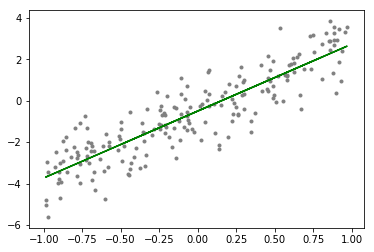

In [9]:
plt.plot(x,y,c='green')
plt.scatter(x,y_noisy, marker='.', c='grey')

### Make this line up better with DL by using matrix multiplication

In [10]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.6390,  1.0000],
        [-0.3163,  1.0000],
        [ 0.5943,  1.0000],
        [ 0.5510,  1.0000],
        [-0.9288,  1.0000]])

In [11]:
a = torch.Tensor([a,b])

In [12]:
y = x@a + torch.randn(n)

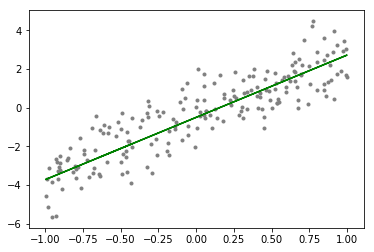

In [13]:
plt.plot(x[:,0],x@a,c='green')
plt.scatter(x[:,0],y, marker='.', c='grey')

### Define a loss function

In [14]:
def mse(y,y_pred):
    return ((y-y_pred)**2).mean()

## starting guess a = (-1,1)

In [15]:
a = torch.tensor([-1.,1])

#### Initial loss

In [16]:
start_loss = mse(x@a,y)
start_loss

tensor(8.5053)

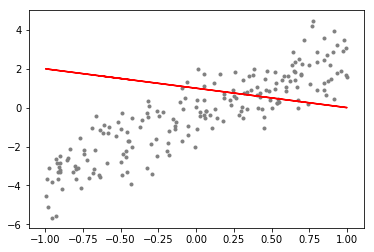

In [17]:
plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

### Gradient Descent

#### learning rate lr

$$ mse=\frac{\sum{(y_{pred}-y)^{2}}}{n}$$
$$mse=\frac{\sum{(a_0 x + a_1 -y)^{2}}}{n}$$

$$ \frac{\partial{mse}}{\partial{a_0}} = \frac{2 \sum{(a_0 x+a_1 - y)} x}{n} = \frac{2 \sum{(y_{pred} - y)}x}{n}  $$

$$ \frac{\partial{mse}}{\partial{a_1}} = \frac{2 \sum{(a_0 x+a_1 - y)}}{n} = \frac{2 \sum{(y_{pred} - y)}}{n} $$

In [18]:
lr = 0.1

In [19]:
def manual_update():
    y_pred = x@a
    loss = mse(y, y_pred)
    if t % 10 == 0: print(f'a = {a[0].item(), a[1].item()} loss: {loss}')
    
    a_0_grad = 2*((y_pred-y)*x[:,0]).mean()
    a_1_grad = 2*(y_pred-y).mean()

    a_grad = torch.tensor([a_0_grad,a_1_grad])
    a.sub_(lr * a_grad)

In [20]:
a = torch.tensor([-1.,1])
for t in range(100):
    manual_update()


a = (-1.0, 1.0) loss: 8.505270004272461
a = (1.089827060699463, -0.19600245356559753) loss: 2.3848414421081543
a = (2.1186470985412598, -0.3603966236114502) loss: 1.288896083831787
a = (2.6179287433624268, -0.39558371901512146) loss: 1.0366780757904053
a = (2.859470844268799, -0.407853364944458) loss: 0.9777969121932983
a = (2.976243019104004, -0.4132768511772156) loss: 0.964040994644165
a = (3.0326874256134033, -0.41584399342536926) loss: 0.9608271718025208
a = (3.0599701404571533, -0.41707906126976013) loss: 0.9600764513015747
a = (3.07315731048584, -0.4176754355430603) loss: 0.9599012136459351
a = (3.079530954360962, -0.41796356439590454) loss: 0.9598600268363953


In [21]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [22]:
a = torch.tensor([-1.,1])

fig = plt.figure()

line, = plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

plt.close()

loss=start_loss

def animate(i):
    manual_update()
    y_pred = x@a
    line.set_ydata(y_pred)
    loss = mse(y_pred,y)
    line.set_color([loss/start_loss,1-(loss/start_loss),0])
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=40)

#### Automated gradient from PyTorch

In [23]:
def pytorch_update():
    y_pred = x@a
    loss = mse(y, y_pred)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [24]:
a = torch.tensor([-1.,1])

fig = plt.figure()

line, = plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

plt.close()

a = torch.nn.Parameter(a)

def animate(i):
    pytorch_update()
    with torch.no_grad():
        y_pred = x@a
        line.set_ydata(y_pred)
        loss = mse(y_pred,y)
        line.set_color([loss/start_loss,1-(loss/start_loss),0])
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=40)